# Setup

In [1]:
# !pip install zadeh

In [1]:
import zadeh
import matplotlib.pyplot as plt
import matplotlib as mpl
import ipywidgets
import pandas as pd
import numpy as np
import functools
import itertools


# set default matplotlib config
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 100
mpl.rcParams['lines.linewidth'] = 0.9
plt.style.use('ggplot')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["green", "yellow", "orange", "red"]) 
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 8

# Variables

**Step 1. Define the input variables**

The linguistic variables are:

1. ``slum_population``: Proportion of urban population living in slum, in percentage terms [%]
2. ``matter_concentration``: Annual mean concentration of particulate matter of less than 2.5 microns in diameter (PM2.5) [mg/m3]
3. ``water_access``: Access to improved water source, in percentage terms of urban population [%]
4. ``public_transport_satisfaction``: Satisfaction with public transport, in percentage [%]
5. ``rent_overburden_population``: Population with rent overburden, in percentage [%]


**Step 2. Fuzzification**

These real variables are transformed into fuzzy variables as follows:

The *universe of discourse* $X_i$ is defined by means of a minimum, maximum and number of steps between those for each variable $\nu_i$. For percentage variables, $X_i = [0, 100]$ by definition and the number of steps is set to 1000. Below, the *fuzzy sets* are completely characterized by defining the subset of values $A^{i}_{j} \subseteq X_i$ and its *membership function* $\mu_{A^{i}_{j}}(x) = \{ (x, \mu_{A^{i}_{j}}(x))| x \in X_i, \mu_{A^{i}_{j}}(x) \in [0, 1]\}$.

There are multiple shapes to define the membership function, but we are using bell-shaped ones and sigmoids.

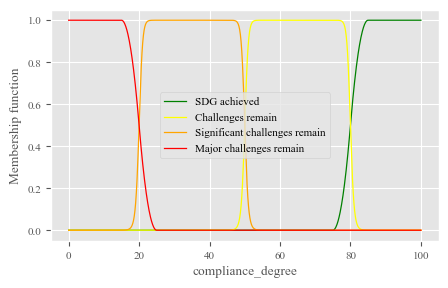

In [2]:
# variable definition
slum_population = zadeh.FuzzyVariable(
    zadeh.FloatDomain("slum_population", 0, 100, 1000),
    {
        'SDG achieved': zadeh.ZFuzzySet(3, 5),
        'Challenges remain': zadeh.BellFuzzySet(5, 5, 10),
        'Significant challenges remain': zadeh.BellFuzzySet(5, 5, 20),
        'Major challenges remain': zadeh.SFuzzySet(23, 30),
    },
)

matter_concentration = zadeh.FuzzyVariable(
    zadeh.FloatDomain("matter_concentration", 0, 87, 1000),
    {
        'SDG achieved': zadeh.ZFuzzySet(7, 12),
        'Challenges remain': zadeh.BellFuzzySet(4, 3, 13.75),
        'Significant challenges remain': zadeh.BellFuzzySet(4, 3, 21.25),
        'Major challenges remain': zadeh.SFuzzySet(23, 30),
    },
)

water_access = zadeh.FuzzyVariable(
    zadeh.FloatDomain("water_access", 0, 100, 1000),
    {
        'SDG achieved': zadeh.SFuzzySet(97, 100),
        'Challenges remain': zadeh.BellFuzzySet(5, 5, 92.25),
        'Significant challenges remain': zadeh.BellFuzzySet(5, 5, 80.75),
        'Major challenges remain': zadeh.ZFuzzySet(72, 77),

    },
)

public_transport_satisfaction = zadeh.FuzzyVariable(
    zadeh.FloatDomain("public_transport_satisfaction", 0, 100, 1000),
    {
        'SDG achieved': zadeh.SFuzzySet(70, 74),
        'Challenges remain': zadeh.BellFuzzySet(7, 7, 64.75),
        'Significant challenges remain': zadeh.BellFuzzySet(7, 7, 50.25),
        'Major challenges remain': zadeh.ZFuzzySet(42, 45),

    },
)

rent_overburden_population = zadeh.FuzzyVariable(
    zadeh.FloatDomain("rent_overburden_population", 0, 100, 1000),
    {
        'SDG achieved': zadeh.ZFuzzySet(5, 7),
        'Challenges remain': zadeh.BellFuzzySet(3, 4, 9.5),
        'Significant challenges remain': zadeh.BellFuzzySet(3, 4, 14.5),
        'Major challenges remain': zadeh.SFuzzySet(15, 19),
    },
)

# OUTPUT
compliance_degree = zadeh.FuzzyVariable(
    zadeh.FloatDomain("compliance_degree", 0, 100, 1000),
    {
        'SDG achieved': zadeh.SFuzzySet(75, 85),
        'Challenges remain': zadeh.BellFuzzySet(15, 15, 65),
        'Significant challenges remain': zadeh.BellFuzzySet(15, 15, 35),
        'Major challenges remain': zadeh.ZFuzzySet(15, 25),

    },
)

# slum_population.plot()
# plt.show()
# matter_concentration.plot()
# plt.show()
# water_access.plot()
# plt.show()
# public_transport_satisfaction.plot()
# plt.show()
# rent_overburden_population.plot()
# plt.show()
compliance_degree.plot()
plt.show()

In [3]:
REVERSED = [slum_population,
            matter_concentration,
            rent_overburden_population
            ]


NOT_REVERSED = [water_access,
                public_transport_satisfaction
                ]

In [4]:
# store linguistic variables as a list
INPUTS = [slum_population,
          matter_concentration,
          water_access,
          public_transport_satisfaction,
          rent_overburden_population]

# Rules

**Step 3. Criteria and **

In [5]:
reversed = [zadeh.FuzzyRuleSet.automatic(
    input_var, compliance_degree, reverse=True, weight=1, 
) for input_var in REVERSED]

not_reversed = [zadeh.FuzzyRuleSet.automatic(
    input_var, compliance_degree, reverse=False, weight=1, 
) for input_var in NOT_REVERSED]

rule_set = zadeh.FuzzyRuleSet(reversed+not_reversed)

# for rule in rule_set:
#     print(rule)

# Build fuzzy inference system

In [6]:
fis = zadeh.FIS(INPUTS, rule_set, compliance_degree, defuzzification='centroid')

In [7]:
IRELAND = {'slum_population': 0,
            'matter_concentration': 7.8, 
            'water_access': 97,
            'public_transport_satisfaction': 61, 
            'rent_overburden_population': 5.6
} 

In [8]:
fis.get_crisp_output(IRELAND)

74.80102309256324

In [9]:
# fis.plot_rules(IRELAND)

# Build FIS given a set of not fixed input variables

In [10]:
# define fuzzy_variables dict as a dictionary with the fuzzy variable and its weight

fuzzy_variables_sdg_11 = {
    "slum_population": {
        "fuzzy_variable": slum_population,
        "reverse": True,
        "weight": 0.1, 
        "type": "input"
    },
    "matter_concentration": {
        "fuzzy_variable": matter_concentration,
        "reverse": True,
        "weight": 0.1,
        "type": "input"
    },
    "water_access": {
        "fuzzy_variable": water_access,
        "reverse": False,
        "weight": 0.1,
        "type": "input"

    },
    "public_transport_satisfaction": {
        "fuzzy_variable": public_transport_satisfaction,
        "reverse": False,
        "weight": 0.1,
        "type": "input"
    },
    "rent_overburden_population": {
        "fuzzy_variable": rent_overburden_population,
        "reverse": True,
        "weight": 0.1,
        "type": "input"
    },
    "compliance_degree": {
        "fuzzy_variable": compliance_degree,
        "reverse": False,
        "weight": None,
        "type": "output"
    }
}


In [11]:
class VariableFIS:
    def __init__(self, fuzzy_variables=fuzzy_variables_sdg_11):
        self.fuzzy_variables = fuzzy_variables
        self.input_variables = {k: v for k, v in fuzzy_variables.items() if v['type'] == 'input'}
        self.output_variable = self.get_output_variable()
        self.rule_set = self.generate_rules()
        self.fis = zadeh.FIS(self.input_variables, self.rule_set, self.output_variable, defuzzification='centroid')
    
    def __call__(self, *args, **kwargs):
        return self.predict(*args, **kwargs)

    def get_output_variable(self):
        """
        Extract only the fuzzy variable from the output variable
        """
        output_variable = {k: v for k, v in self.fuzzy_variables.items() if v['type'] == 'output'}
        return list(output_variable.values())[0]['fuzzy_variable']

    def add_green_rule(self, weight=1):
        """
        Define the green rule as stated in the SDG report 2022 
        to avoid the 
        """
        # take input fuzzy variables in a list
        input_variables = [v['fuzzy_variable'] for v in self.input_variables.values()]       
        # define each individual antecedent for SDG achieved (green)
        antecedents = [(variable == "SDG achieved") for variable in input_variables]
        # combine fuzzy propositions in antecedents with AND operation
        antecedents = functools.reduce(lambda x, y: x & y, antecedents)
        # make fuzzy implication from antecedents
        green_rule = zadeh.FuzzyRule(antecedents, compliance_degree == "SDG achieved", weight=weight)
        return green_rule

    def add_red_rule(self, weight=1):
        """
        Define the red rule as stated in the SDG report 2022 
        to avoid the 
        """
        # take input fuzzy variables in a list
        input_variables = [v['fuzzy_variable'] for v in self.input_variables.values()]       
        # define each individual antecedent for SDG achieved (green)
        antecedents = [(variable == "Major challenges remain") for variable in input_variables]
        # make combinations with AND for every two possible combination of variables in input_variables
        antecedents = [functools.reduce(lambda x, y: x & y, combination) for combination in itertools.combinations(antecedents, 2)]
        # combine each two antecedents above with OR operation
        antecedents = functools.reduce(lambda x, y: x | y, antecedents)
        # make fuzzy implication from antecedents
        red_rule = zadeh.FuzzyRule(antecedents, compliance_degree == "Major challenges remain", weight=weight)
        return red_rule

    def generate_rules(self):
        """
        Generate rules for the FIS

        Returns:
            FuzzyRuleSet: list of rules
        """

        reversed = [zadeh.FuzzyRuleSet.automatic(
            input_var['fuzzy_variable'], self.output_variable, reverse=True, weight=input_var['weight'],
        ) for input_var in self.input_variables.values() if input_var['reverse']]        

        not_reversed = [zadeh.FuzzyRuleSet.automatic(
            input_var['fuzzy_variable'], self.output_variable, reverse=False, weight=input_var['weight'],
        ) for input_var in self.input_variables.values() if not input_var['reverse']]

        # added rules: if all input variables are 'SDG achieved' then, 'SDG achieved'
        try:   
            green_rule = self.add_green_rule(weight=1)
            red_rule = self.add_red_rule(weight=1)
        except Exception as e:
            print(e)
            green_rule = None
            red_rule = None


        if ((green_rule is not None) and (red_rule is not None)):
            rule_set = zadeh.FuzzyRuleSet(reversed + not_reversed + [green_rule] + [red_rule])
        else:
            rule_set = zadeh.FuzzyRuleSet(reversed + not_reversed)

        # for rule in rule_set:
        #     print(rule)
        return rule_set
    
    def _infer_input_variables_from_input(self, input):
        """
        Select input variables to match the ones of the input 

        Args:
            input (dict): input dictionary with the crisp inputs

        Returns:
            dict: dictionary with input variables
        """

        # if a key on input variables is not in the input, pop it 
        for key in list(self.input_variables.keys()):
            if key not in input:
                self.input_variables.pop(key)
    
    def predict(self, input):
        # if a value is nan, drop the item 
        input = {k: v for k, v in input.items() if not np.isnan(v)}
        # select input variables for the given input
        self._infer_input_variables_from_input(input)
        # update rules
        self.rule_set = self.generate_rules()
        # update fis for this variables
        self.fis = zadeh.FIS(self.input_variables, self.rule_set, self.output_variable, defuzzification='centroid')
        return self.fis.get_crisp_output(input)

    def plot_rules(self, *args, **kwargs):
        return self.fis.plot_rules(*args, **kwargs)

In [12]:
# example of input without all variables
IRELAND = {'slum_population': 0,
            'matter_concentration': 7.8,
            'water_access': 97,
            'public_transport_satisfaction': 61,
            # 'rent_overburden_population': 5.6
}
vfis = VariableFIS()
vfis(IRELAND)

74.80102309256323

In [14]:
rule_block = vfis.rule_set[-2]
rule_block.antecedent

FuzzyProposition<(((slum_population is SDG achieved) and (matter_concentration is SDG achieved)) and (water_access is SDG achieved)) and (public_transport_satisfaction is SDG achieved)>

In [86]:
# create dataframe with each fuzzy rule: antecedent and consequent and weight
antecedents = []
consequents = []
weights = []

for rule_block in list(vfis.rule_set[:-2]):
    for rule in rule_block:
        antecedents.append(rule.antecedent)
        consequents.append(rule.consequent)
        weights.append(rule.weight)
for rule in vfis.rule_set[-2:]:
    antecedents.append(rule.antecedent)
    consequents.append(rule.consequent)
    weights.append(rule.weight)

rule_df = pd.DataFrame({'antecedent': antecedents, 'consequent': consequents, 'weight': weights})
rule_df
# str(vfis.rule_set[0][0].antecedent)

,antecedent,consequent,weight
0,slum_population is SDG achieved,compliance_degree is SDG achieved,0.1
1,slum_population is Challenges remain,compliance_degree is Challenges remain,0.1
2,slum_population is Significant challenges remain,compliance_degree is Significant challenges re...,0.1
3,slum_population is Major challenges remain,compliance_degree is Major challenges remain,0.1
4,matter_concentration is SDG achieved,compliance_degree is SDG achieved,0.1
5,matter_concentration is Challenges remain,compliance_degree is Challenges remain,0.1
6,matter_concentration is Significant challenges...,compliance_degree is Significant challenges re...,0.1
7,matter_concentration is Major challenges remain,compliance_degree is Major challenges remain,0.1
8,water_access is Major challenges remain,compliance_degree is Major challenges remain,0.1
9,water_access is Significant challenges remain,compliance_degree is Significant challenges re...,0.1


# Comparison

In [27]:
sdg_11 = pd.read_csv('./sdg_11.csv')
# rename columns of indicators to match variables
sdg_11.rename(columns={'Proportion of urban population living in slums (%)': 'slum_population',
                          'Annual mean concentration of particulate matter of less than 2.5 microns in diam': 'matter_concentration',
                            'Access to improved water source, piped (% of urban population)': 'water_access',
                            'Satisfaction with public transport (%)': 'public_transport_satisfaction',
                            'Population with rent overburden (%)': 'rent_overburden_population'
                            }, inplace=True)
sdg_11.head()

,Country Code ISO3,Country,Goal 11 Score,Goal 11 Dash,slum_population,matter_concentration,water_access,public_transport_satisfaction,rent_overburden_population
0,AFG,Afghanistan,29.3085,red,73.5,54.950,41.859,34.0,NaN
1,AGO,Angola,47.5600,red,47.0,32.322,59.482,32.0,NaN
2,ALB,Albania,74.4770,orange,13.2,17.541,83.730,48.0,NaN
3,AND,Andorra,NaN,yellow,NaN,11.189,100.000,NaN,NaN
4,ARE,United Arab Emirates,78.0860,yellow,NaN,41.669,NaN,84.0,NaN


In [28]:
# check if Goal 11 Score is equal to (slum_population+matter_concentration+water_access+public_transport_satisfaction+rent_overburden_population)/5
sdg_11['Goal 11 Score Check'] = sdg_11[['slum_population', 'matter_concentration', 'water_access', 'public_transport_satisfaction', 'rent_overburden_population']].mean(axis=1)
sdg_11

,Country Code ISO3,Country,Goal 11 Score,Goal 11 Dash,slum_population,matter_concentration,water_access,public_transport_satisfaction,rent_overburden_population,Goal 11 Score Check
0,AFG,Afghanistan,29.30850,red,73.500,54.950,41.859,34.000,NaN,51.07725
1,AGO,Angola,47.56000,red,47.000,32.322,59.482,32.000,NaN,42.70100
2,ALB,Albania,74.47700,orange,13.200,17.541,83.730,48.000,NaN,40.61775
3,AND,Andorra,NaN,yellow,NaN,11.189,100.000,NaN,NaN,55.59450
4,ARE,United Arab Emirates,78.08600,yellow,NaN,41.669,NaN,84.000,NaN,62.83450
...,...,...,...,...,...,...,...,...,...,...
200,_Africa,Sub-Saharan Africa,46.72350,red,56.670,47.777,58.829,48.784,NaN,53.01500
201,_LIC,Low-income Countries,45.70900,red,66.910,44.310,69.520,43.632,NaN,56.09300
202,_LMIC,Lower-middle-income Countries,54.95300,red,35.970,63.116,61.505,64.846,NaN,56.35925
203,_UMIC,Upper-middle-income Countries,78.90825,orange,20.208,36.384,93.593,71.628,NaN,55.45325


In [30]:
def add_color(record, return_linguistic_var=False):

    record = {k: v for k, v in record.items() if k in fuzzy_variables_sdg_11.keys()}

    # if the number of non nan values in record is less or equal to one, then equal values to grey (=not enough info)
    if ((len([v for v in record.values() if not np.isnan(v)])<=1) or (all(np.isnan(v) for v in record.values()))):
        compliance_degree = np.nan 
        linguistic_var = "grey"
    else:
        vfis = VariableFIS()
        compliance_degree = vfis(record)
        
        # map crisp prediction to linguistic variable
        if compliance_degree <= 20:
            linguistic_var = "red"
        elif compliance_degree <= 50:
            linguistic_var = "orange"
        elif compliance_degree <= 80:
            linguistic_var = "yellow"
        else:
            linguistic_var = "green"
    
    # print(compliance_degree, linguistic_var)
    
    if return_linguistic_var:
        return linguistic_var
    else:
        return compliance_degree

# add color with fis for each instance of sdg_11
sdg_11['fis_color'] = sdg_11.apply(lambda x: add_color(x.to_dict(), return_linguistic_var=True), axis=1)
sdg_11

,Country Code ISO3,Country,Goal 11 Score,Goal 11 Dash,slum_population,matter_concentration,water_access,public_transport_satisfaction,rent_overburden_population,Goal 11 Score Check,fis_color
0,AFG,Afghanistan,29.30850,red,73.500,54.950,41.859,34.000,NaN,51.07725,red
1,AGO,Angola,47.56000,red,47.000,32.322,59.482,32.000,NaN,42.70100,red
2,ALB,Albania,74.47700,orange,13.200,17.541,83.730,48.000,NaN,40.61775,orange
3,AND,Andorra,NaN,yellow,NaN,11.189,100.000,NaN,NaN,55.59450,yellow
4,ARE,United Arab Emirates,78.08600,yellow,NaN,41.669,NaN,84.000,NaN,62.83450,orange
...,...,...,...,...,...,...,...,...,...,...,...
200,_Africa,Sub-Saharan Africa,46.72350,red,56.670,47.777,58.829,48.784,NaN,53.01500,red
201,_LIC,Low-income Countries,45.70900,red,66.910,44.310,69.520,43.632,NaN,56.09300,red
202,_LMIC,Lower-middle-income Countries,54.95300,red,35.970,63.116,61.505,64.846,NaN,56.35925,red
203,_UMIC,Upper-middle-income Countries,78.90825,orange,20.208,36.384,93.593,71.628,NaN,55.45325,orange


In [18]:
# # check rows where goal dash are grey
# sdg_11[sdg_11['Goal 11 Dash']=="grey"]
# # check rows where indicators are all nan
# sdg_11[sdg_11['slum_population'].isna() & sdg_11['matter_concentration'].isna() & sdg_11['water_access'].isna() & sdg_11['public_transport_satisfaction'].isna() & sdg_11['rent_overburden_population'].isna()]

In [31]:
# compare fis_color and goal 11 dash
comparison = sdg_11[['Country', 'fis_color', 'Goal 11 Dash']].dropna()
# select instances for which the string value in fis_color and goal 11 dash are different
comparison = comparison.loc[~(comparison['fis_color'] == comparison['Goal 11 Dash'])]

print("Number of instances where fis_color and goal 11 dash are different: ", len(comparison))
print("Number of total instances:", len(sdg_11))
comparison

Number of instances where fis_color and goal 11 dash are different:  43
Number of total instances: 205


,Country,fis_color,Goal 11 Dash
4,United Arab Emirates,orange,yellow
5,Argentina,yellow,orange
16,Bulgaria,yellow,orange
19,Bosnia and Herzegovina,orange,red
21,Belize,yellow,orange
23,Brazil,yellow,orange
27,Botswana,yellow,orange
31,Chile,yellow,orange
32,China,yellow,orange
42,Cyprus,yellow,orange


In [ ]:
# print Goal 11 Regional Score for Country Ireland
sdg_11[sdg_11['Country'] == 'Ireland'].iloc[0].to_dict()

{'Country Code ISO3': 'IRL',
 'Country': 'Ireland',
 'Goal 11 Regional Score': 88.81518201754386,
 'Goal 11 Dash': 'yellow',
 'slum_population': 0.0,
 'matter_concentration': 7.765000000000001,
 'water_access': 96.965,
 'public_transport_satisfaction': 61.0,
 'rent_overburden_population': 5.6080000000000005}

In [ ]:
sdg_records = sdg_11.to_dict(orient='records')
# take example of record and select as items the indicators
record = sdg_records[-1]
# print country, goal 11 score and goal 11 dash from records 
# print(record['Country'], record['Goal 11 Regional Score'], record['Goal 11 Dash'])
print(record)
record = {k: v for k, v in record.items() if k in fuzzy_variables_sdg_11.keys()}
# use fis
vfis = VariableFIS()
print(vfis(record))

{'Country Code ISO3': '_HIC', 'Country': 'High-income Countries', 'Goal 11 Regional Score': nan, 'Goal 11 Dash': 'yellow', 'slum_population': 0.002, 'matter_concentration': 14.047, 'water_access': 99.232, 'public_transport_satisfaction': 62.871, 'rent_overburden_population': nan}
75.76684454644646


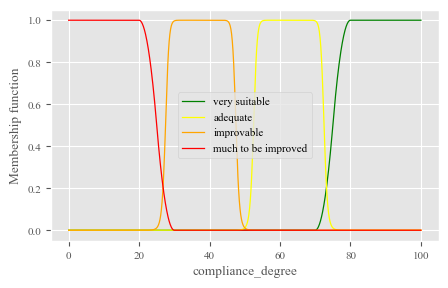

In [ ]:
vfis.output_variable.plot()

# Session info

In [ ]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.6.1
numpy               1.23.3
pandas              1.5.0
session_info        1.0.0
zadeh               0.3.0
-----
IPython             8.5.0
jupyter_client      7.3.5
jupyter_core        4.11.1
-----
Python 3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:37:50) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22000-SP0
-----
Session information updated at 2022-10-18 17:44
